In [1]:
import pandas as pd 
import numpy as np

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

import matplotlib.font_manager as font_manager
mpl.font_manager._rebuild()

mpl.rcParams['font.family'] = 'SF Mono'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

from termcolor import colored

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, LogisticRegression, Ridge, ElasticNet, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder

from entsoe import EntsoePandasClient

Matplotlib is building the font cache; this may take a moment.


In [2]:
import import_ipynb
from data import create_features

years = [2018]
lags_ID = range(-4, -169, -1)
lags_DA = [i for i in range(5, -6, -1) if i not in [0]]
lags_VOL = [i for i in range(-4, -25, -1) if i not in [0]]

ID, DA, features = create_features(years, lags_ID, lags_DA, lags_VOL)

importing Jupyter notebook from data.ipynb


In [3]:
ID.head(5)

,ID3,Volume
Instrument,,
2018-01-01 00:00:00,14.586875,221.4
2018-01-01 01:00:00,12.990924,669.7
2018-01-01 02:00:00,22.150235,752.0
2018-01-01 03:00:00,21.917514,460.2
2018-01-01 04:00:00,21.621781,453.0


In [4]:
DA.head(5)

,MCP
Instrument,
2018-01-01 00:00:00,27.20
2018-01-01 01:00:00,27.30
2018-01-01 02:00:00,30.10
2018-01-01 03:00:00,20.87
2018-01-01 04:00:00,25.56


In [5]:
features.head(5)

,ID3,VOL,MCP,Load,Load forecast,LFE,ID3 (-4),ID3 (-5),ID3 (-6),ID3 (-7),...,HOD 14,HOD 15,HOD 16,HOD 17,HOD 18,HOD 19,HOD 20,HOD 21,HOD 22,HOD 23
2018-01-01 05:00:00+00:00,22.352647,490.3,25.58,9768.25,11085.25,1317.00,25.114449,24.868167,25.978476,26.555409,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 06:00:00+00:00,23.071457,527.6,25.81,10069.75,12266.50,2196.75,24.868167,25.978476,26.555409,28.621735,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 07:00:00+00:00,24.345686,507.7,29.90,10408.75,14147.50,3738.75,25.978476,26.555409,28.621735,29.089427,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 08:00:00+00:00,25.257541,1032.5,26.33,10693.25,15932.50,5239.25,26.555409,28.621735,29.089427,35.102530,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 09:00:00+00:00,25.114449,771.8,26.38,11050.25,16809.75,5759.50,28.621735,29.089427,35.102530,41.704858,...,0,0,0,0,0,0,0,0,0,0


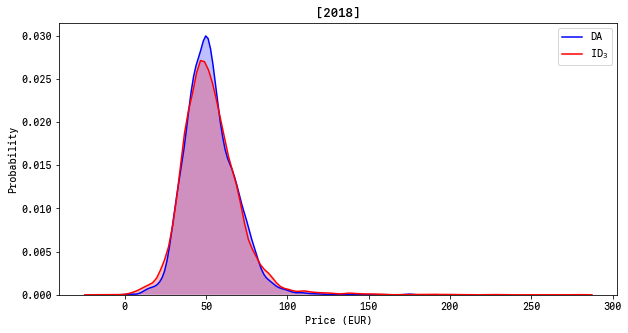

In [6]:
# Plotting the KDE Plot 
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(DA['MCP'], color = 'b', shade = True, label = r'DA')
sns.kdeplot(ID['ID3'], color = 'r', shade = True, label = r'ID$_3$')

ax.set_title(f'{years}')
ax.set_xlabel(r'Price (EUR)')
ax.set_ylabel(r'Probability');

In [7]:
# DA = pd.read_pickle(f"./DA.pkl")
# ID = pd.read_pickle(f"./ID3.pkl")

# DA = DA.set_index('Instrument')
# ID = ID.set_index('Instrument')

# year = 2018

# DA = DA.loc[(DA.index.year == year)]
# ID = ID.loc[(ID.index.year == year)]

# # Plotting the KDE Plot 
# fig, ax = plt.subplots(figsize=(10, 5))

# sns.kdeplot(DA['MCP'], color = 'b', shade = True, label = r'DA')
# sns.kdeplot(ID['ID3'], color = 'r', shade = True, label = r'ID$_3$')

# ax.set_title(f'{year}')
# ax.set_xlabel(r'Price (EUR)')
# ax.set_ylabel(r'Probability');

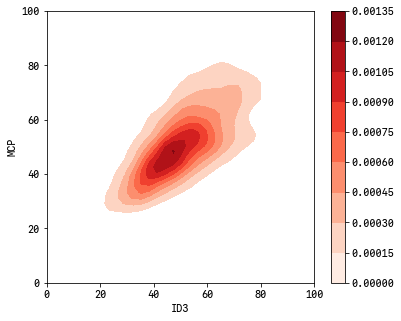

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = features['ID3']
y = features['MCP']
sns.kdeplot(x, y, shade=True, cmap="Reds", shade_lowest=False, cbar=True)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

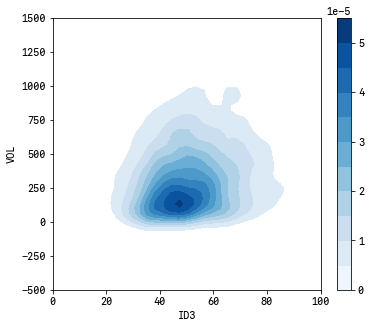

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = features['ID3']
y = features['VOL']
sns.kdeplot(x, y, shade=True, cmap="Blues", shade_lowest=False, cbar=True)

ax.set_xlim(0, 100)
ax.set_ylim(-500, 1500);

<AxesSubplot:xlabel='VOL', ylabel='LFE'>

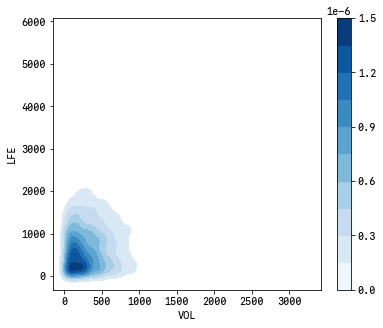

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = features['VOL']
y = features['LFE']
sns.kdeplot(x, y, shade=True, cmap="Blues", shade_lowest=False, cbar=True)

# ax.set_xlim(0, 100)
# ax.set_ylim(0, 100);

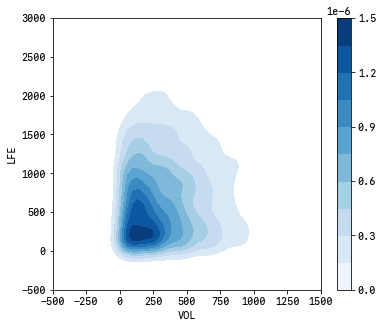

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = features['VOL']
y = features['LFE']
sns.kdeplot(x, y, shade=True, cmap="Blues", shade_lowest=False, cbar=True)

ax.set_xlim(-500, 1500)
ax.set_ylim(-500, 3000);

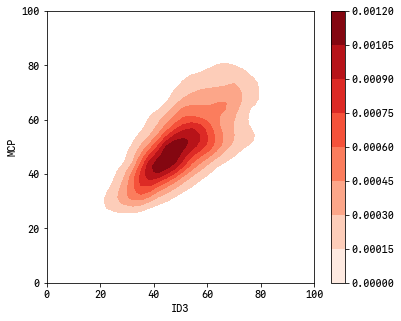

In [12]:
price = pd.merge(DA, ID, left_index=True, right_index=True, how='outer')

price = price.dropna()
price = price.reset_index()

fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = price['ID3']
y = price['MCP']
sns.kdeplot(x, y, color='r', shade=True, cmap="Reds", shade_lowest=False, cbar=True);

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

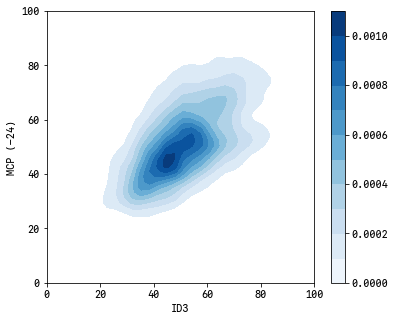

In [13]:
lag = 24
price[f'MCP (-{lag})'] = price['MCP'].shift(-lag)
price[f'ID3 (-{lag})'] = price['ID3'].shift(-lag)
price = price.dropna()

fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = price['ID3']
y = price[f'MCP (-{lag})']
sns.kdeplot(x, y, color='r', shade=True, cmap="Blues", shade_lowest=False, cbar=True);

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

In [14]:
for month in range(1, 13):
    price_month = price.loc[(price['Instrument'].dt.month == month)]
    
    print(), print(colored(f'Processing: Month {month}', 'blue')), print()

    # plt.figure()

    g = sns.PairGrid(price_month)
    g.map_diag(sns.kdeplot, color = 'b', shade = True)
    g.map_offdiag(sns.kdeplot, n_levels=6, cmap="Blues")

    g.set(xlim=(-50, 200), ylim=(-50, 200))

    g.fig.suptitle(f'{year}.{month}', y = 1.05)

    plt.show()


Processing: Month 1



NameError: name 'year' is not defined